# Volunteers In Medicine Clinic (Stuart) EDA / Re-Admission Risk Calculator

### Andrew Dodds
#### 9/28/20

In [1]:
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score 
from sklearn import metrics
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
print("Library Import Successful")

Library Import Successful


In [2]:
LR = LR()

In [3]:
df = pd.read_csv("C:/Users/thech/Desktop/train.csv")

In [4]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


#### EDA on Re-admission Rates

In [5]:
count_no_sub = len(df[df['readmitted'] ==0])
count_sub = len(df[df['readmitted']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("The percentage of Patients who are NOT Re-admitted is", round(pct_of_no_sub*100,2),"%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("The percentage of Re-Admitted Patients is", round(pct_of_sub*100,2),"%")

The percentage of Patients who are NOT Re-admitted is 54.36 %
The percentage of Re-Admitted Patients is 45.64 %


In [6]:
df.groupby('readmitted').mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes
readmitted,,,,,,,,,,,,,,,,,,,,,
0,4.237822,42.233996,1.419132,15.569610,0.268212,0.112656,0.392494,7.200662,0.731273,0.192494,...,1.0,1.0,0.490802,0.994923,0.999926,1.000000,1.0,1.0,0.565489,0.744224
1,4.583611,43.824978,1.248116,16.487292,0.482296,0.311218,0.941367,7.681595,0.755039,0.192901,...,1.0,1.0,0.442331,0.992112,0.999737,0.999912,1.0,1.0,0.515337,0.795004


#### There does not appear to be any distinguishing features in Patient Re-admissions

Text(0, 0.5, 'Number of Patients')

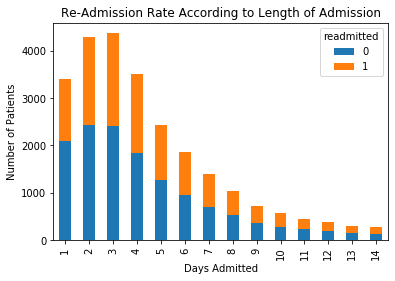

In [7]:
pd.crosstab(df.time_in_hospital,df.readmitted).plot(kind='bar', stacked=True)
plt.title('Re-Admission Rate According to Length of Admission')
plt.xlabel('Days Admitted')
plt.ylabel('Number of Patients')

### Observe the Correlation matrix to utilise relevant indicators

In [8]:
df.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
time_in_hospital,1.000000,0.324888,0.192580,0.461874,-0.013918,-0.013573,0.073334,0.215924,-0.001568,0.013468,...,NaN,-0.092715,0.005704,0.000616,0.005066,NaN,NaN,-0.106270,0.066586,0.057583
num_lab_procedures,0.324888,1.000000,0.057895,0.273101,-0.018161,-0.016669,0.038290,0.154354,-0.025144,0.027197,...,NaN,-0.103450,0.016918,0.002854,0.001587,NaN,NaN,-0.070928,0.031332,0.040087
num_procedures,0.192580,0.057895,1.000000,0.390198,-0.028145,-0.039572,-0.073735,0.071921,0.028521,-0.024382,...,NaN,-0.017412,-0.000522,0.008093,0.004974,NaN,NaN,-0.009640,-0.007307,-0.049950
num_medications,0.461874,0.273101,0.390198,1.000000,0.039319,0.011724,0.058422,0.267158,0.051094,-0.031677,...,NaN,-0.215585,-0.005079,-0.005869,0.007012,NaN,NaN,-0.254378,0.194301,0.056378
number_outpatient,-0.013918,-0.018161,-0.028145,0.039319,1.000000,0.095898,0.115013,0.096235,0.058106,-0.046936,...,NaN,-0.005727,-0.001980,-0.001385,0.001890,NaN,NaN,-0.027785,0.026432,0.087092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
metformin-rosiglitazone_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metformin-pioglitazone_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
change_No,-0.106270,-0.070928,-0.009640,-0.254378,-0.027785,-0.034593,-0.016550,-0.068236,-0.000157,0.008203,...,NaN,0.510110,0.045727,0.013778,0.006889,NaN,NaN,1.000000,-0.505478,-0.050143
diabetesMed_Yes,0.066586,0.031332,-0.007307,0.194301,0.026432,0.023894,0.021595,0.028840,-0.012676,0.009706,...,NaN,-0.586184,-0.044046,-0.006964,-0.003482,NaN,NaN,-0.505478,1.000000,0.059868


#### Randomize the dataset and extract a training dataset at 80:20 split

In [17]:
df = df.sample(frac=1)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 64) (20000,)
(5000, 64) (5000,)


In [18]:
LR.fit(X_train,y_train)

pred = LR.predict(X_test)

C:\Users\thech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


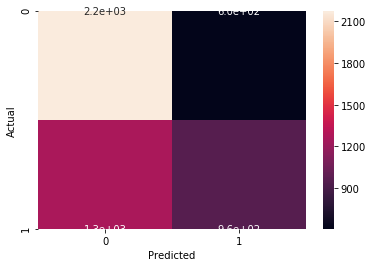

In [19]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [20]:
print('Accuracy: ',metrics.accuracy_score(y_test, pred))
plt.show()

Accuracy:  0.6262


In [21]:
print(X_test)
print(pred)

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
10740                 4                  83               0               15   
24936                 8                  23               1                9   
15727                 4                  43               0               20   
20940                 3                  39               0               13   
12939                14                  29               3               13   
...                 ...                 ...             ...              ...   
7387                  6                  41               0               12   
20467                 4                  22               6               27   
18335                 7                  80               2               26   
14821                 4                  23               0               13   
9896                  2                  49               0                1   

       number_outpatient  number_emerge